In [75]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from astropy import constants as const
import astropy.units as u
from sklearn.neighbors import KernelDensity
import palettable
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
cs = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
from astropy.table import Table 


In [2]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_EQW_FLAG == 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

df = df[df.OIII_SNR_FLAG == 0] # Really should do this on OIII_FIT_Z_FULL_OIII_PEAK? Also, when I've finished calculating it
# just look at the fractional error, since that would be a lot simpler. 

# df = df[df.OIII_FIT_HB_Z_FLAG == 1] # need to relax this 

x = const.c.to(u.km/u.s)*(df.OIII_FIT_Z_FULL_OIII_PEAK - df.OIII_FIT_HB_Z)/(1.0 + df.OIII_FIT_Z_FULL_OIII_PEAK)

norm = np.std(x)
x = x / norm

x_d = np.linspace(-4, 4, 1000)

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

grid.best_params_



{'bandwidth': 0.36783797718286343}

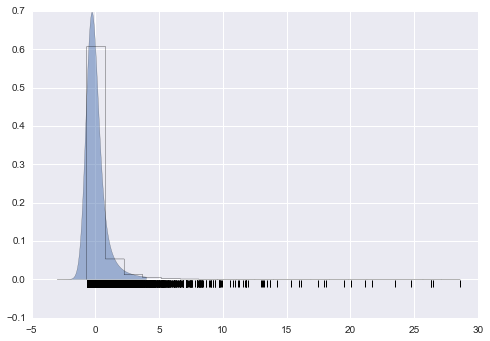

In [148]:
kde = KernelDensity(bandwidth=0.4, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

n, bins, patches = plt.hist(x,
        histtype='step',
        color='black',
        bins=20,
        zorder=1,
        normed=True)



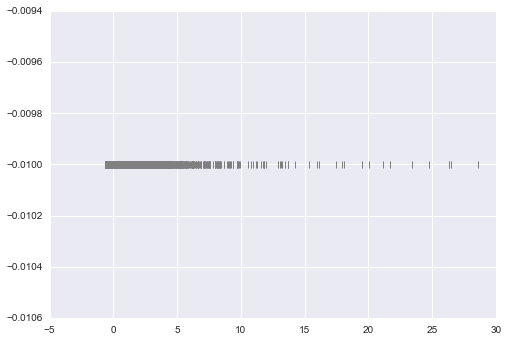

In [158]:
fig, ax = plt.subplots()

ax.plot(x, np.full_like(x, -0.01), marker='|', markeredgecolor='grey', linestyle='', markeredgewidth=1)


Peak at 0 is suspicious 



In [ ]:
print df.REDCHI.sort_values(ascending=False).head

In [8]:
df_nir = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df_nir = df_nir[df_nir.OIII_FLAG_2 > 0]
df_nir = df_nir[df_nir.OIII_BAD_FIT_FLAG == 0]
df_nir = df_nir[df_nir.FE_FLAG == 0]

df_nir['LOGLBOL'] = np.log10(9.26) + df_nir.LogL5100
df_nir.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df_nir.reset_index(inplace=True)
df_nir = df_nir[['LOGLBOL', 'EW_OIII_5007']]

# need to fix upper limits 

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df = pd.concat([df, df_sdss], ignore_index=True)

df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])

# df.loc[df.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 # not great because these could be significant
# df.sort_values('LOGLBOL', inplace=True)

/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


In [ ]:
t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')

t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[t['EW_OIII_5007_ERR'] < 1e3] # one with extreme value 

0.0 83.6082801121


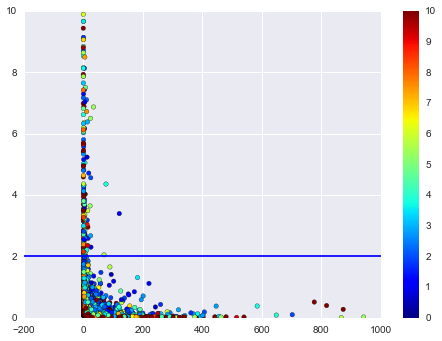

In [31]:
# print t['LINE_MED_SN_HB']

plt.scatter(t['EW_OIII_5007'], t['EW_OIII_5007_ERR'] / t['EW_OIII_5007'], c=t['LINE_MED_SN_HB'], vmin=0.0, vmax=10, cmap='jet')
plt.colorbar()
print np.min(t['LINE_MED_SN_HB']), np.max(t['LINE_MED_SN_HB'])
plt.ylim(0, 10)
plt.axhline(2.0)

/data/lc585/venv/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


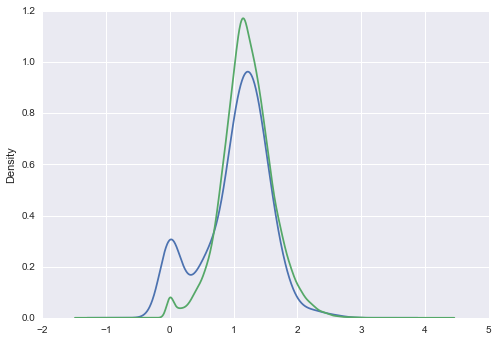

In [110]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 
df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

df['LOGLBOL'] = np.log10(9.26) + df.LogL5100
df.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df.reset_index(inplace=True)
df = df[['LOGLBOL', 'EW_OIII_5007']]

df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])
df.loc[df.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

df.sort_values('LOGLBOL', inplace=True)

# need to fix upper limits 

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss.loc[df_sdss.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

df_sdss.sort_values('LOGLBOL', inplace=True)

fig, ax = plt.subplots()

df.LOG_EW_OIII_5007.plot(kind='kde', ax=ax)
df_sdss.LOG_EW_OIII_5007.plot(kind='kde', ax=ax)
        

NIR max: 15.0984577662
Bandwidth: 16.0662110809
SDSS max: 15.3236098735


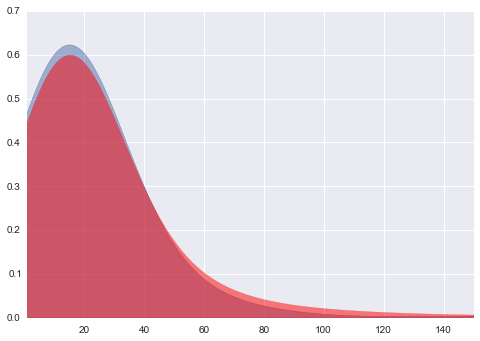

In [85]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_5007_EQW_3 > 1.0]

df['LOGLBOL'] = np.log10(9.26) + df.LogL5100
df.rename(columns={'OIII_5007_EQW_3': 'EW_OIII_5007'}, inplace=True)
df.reset_index(inplace=True)
df = df[['LOGLBOL', 'EW_OIII_5007']]
df['LOG_EW_OIII_5007'] = np.log10(df['EW_OIII_5007'])

df.sort_values('LOGLBOL', inplace=True)

x = df.EW_OIII_5007.values

std = np.std(x)
mean = np.mean(x)

x = (x - mean) / std

x_d = np.linspace(-3, 4, 1000)

if False:
    
    bandwidths = 10 ** np.linspace(-2, 0, 100)
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=LeaveOneOut(len(x)))
    grid.fit(x[:, None]);

    print grid.best_params_
    
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d * std + mean, np.exp(logprob), alpha=0.5)

print 'NIR max: {}'.format(x_d[np.exp(logprob).argmax()] * std + mean)
# plt.axvline(x_d[np.exp(logprob).argmax()] * std + mean)

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss = df_sdss[df_sdss.EW_OIII_5007 > 1.0]

df_sdss.sort_values('LOGLBOL', inplace=True)

x = df_sdss.EW_OIII_5007.values

x = (x - mean) / std

kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(x[:, None])

print 'Bandwidth: {}'.format(0.5 * std) 
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d * std + mean, np.exp(logprob), alpha=0.5, color='red')

plt.xlim(1, 150)

print 'SDSS max: {}'.format(x_d[np.exp(logprob).argmax()] * std + mean)
# plt.axvline(x_d[np.exp(logprob).argmax()] * std + mean)

# plt.savefig('/home/lc8figure1.png')

only objects with EQW > 1A (not sure about upper limits)

In [80]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

print len(df[df.OIII_5007_EQW_3 < 1.0]) / len(df)

t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007']]
df_sdss = t.to_pandas()

print len(df_sdss[df_sdss.EW_OIII_5007 < 1.0]) / len(df_sdss)

0.10303030303
0.00900159705754


In [35]:
10 ** np.linspace(-1, 1, 100)

array([  0.1       ,   0.10476158,   0.10974988,   0.1149757 ,
         0.12045035,   0.12618569,   0.13219411,   0.13848864,
         0.14508288,   0.15199111,   0.15922828,   0.16681005,
         0.17475284,   0.18307383,   0.19179103,   0.2009233 ,
         0.21049041,   0.22051307,   0.23101297,   0.24201283,
         0.25353645,   0.26560878,   0.27825594,   0.29150531,
         0.30538555,   0.31992671,   0.33516027,   0.35111917,
         0.36783798,   0.38535286,   0.40370173,   0.42292429,
         0.44306215,   0.46415888,   0.48626016,   0.5094138 ,
         0.53366992,   0.55908102,   0.58570208,   0.61359073,
         0.64280731,   0.67341507,   0.70548023,   0.7390722 ,
         0.77426368,   0.81113083,   0.84975344,   0.89021509,
         0.93260335,   0.97700996,   1.02353102,   1.07226722,
         1.12332403,   1.17681195,   1.23284674,   1.29154967,
         1.35304777,   1.41747416,   1.48496826,   1.55567614,
         1.62975083,   1.70735265,   1.78864953,   1.87

(44, 49)

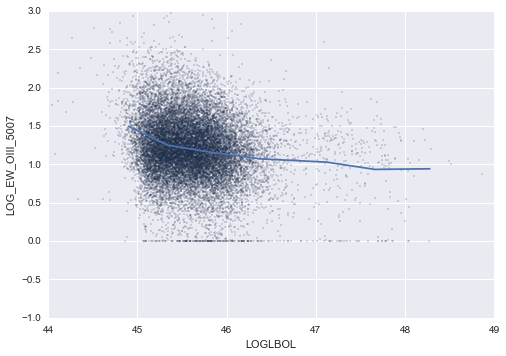

In [92]:


fig, ax = plt.subplots()

df.plot(kind='scatter', 
        x='LOGLBOL', 
        y='LOG_EW_OIII_5007',
        ax=ax,
        s=1,
        alpha=0.4)



# plt.plot(df.LOGLBOL.rolling(window=101).mean(), df.LOG_EW_OIII_5007.rolling(window=101).mean())

ax.set_ylim(-1, 3)
ax.set_xlim(44, 49)

(44, 49)

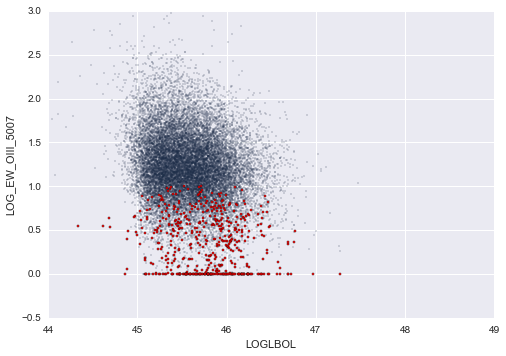

In [89]:
t = Table.read('/data/lc585/SDSS/dr7_bh_Nov19_2013.fits')
t = t[t['LOGLBOL'] > 0.0]
t = t[t['EW_OIII_5007'] > 0.0]
t = t[['LOGLBOL', 'EW_OIII_5007', 'EW_OIII_5007_ERR']]
df_sdss = t.to_pandas()

df_sdss['UPLIM'] = 0
df_sdss.loc[df_sdss['EW_OIII_5007'] < df_sdss['EW_OIII_5007_ERR'], 'UPLIM'] = 1
df_sdss.loc[df_sdss['EW_OIII_5007'] > 10.0, 'UPLIM'] = 0 # only when line is weak

df_sdss['LOG_EW_OIII_5007'] = np.log10(df_sdss['EW_OIII_5007'])
df_sdss.loc[df_sdss.LOG_EW_OIII_5007 < 0.0, 'LOG_EW_OIII_5007'] = 0.0 

grouped = df_sdss.groupby('UPLIM')

df_uplim = grouped.get_group(1)
df_sdss = grouped.get_group(0)

fig, ax = plt.subplots()

df_sdss.plot(kind='scatter', 
             x='LOGLBOL', 
             y='LOG_EW_OIII_5007',
             ax=ax,
             s=1,
             alpha=0.4)

df_uplim.plot(kind='scatter', 
              x='LOGLBOL', 
              y='LOG_EW_OIII_5007',
              ax=ax,
              s=5,
              alpha=1.0,
              color='red')

ax.set_ylim(-0.5, 3)
ax.set_xlim(44, 49)

0.108974358974


(0.5, 100.0)

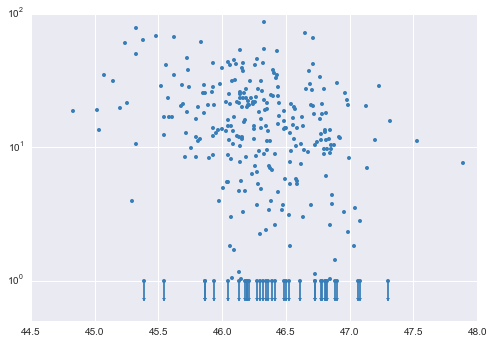

In [147]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0)   

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]
df = df[df.OIII_EXTREM_FLAG == 0]

# significant = df.OIII_5007_EQW_3 > 1.0*(df.OIII_5007_EQW_MODEL_P84 - df.OIII_5007_EQW_MODEL_P50)

fig, ax = plt.subplots()

df1 = df[df.OIII_5007_EQW_3 > 1] 
df2 = df[df.OIII_5007_EQW_3 <= 1] 

ax.plot(df1.LogL5100,
        df1.OIII_5007_EQW_3,
        marker='o',
        linestyle='',
        color=cs[1],
        markersize=4)

ax.errorbar(df2.LogL5100,
            np.ones_like(df2.LogL5100),
            yerr=0.3, 
            uplims=True,
            marker='o',
            linestyle='',
            capsize=2,
            color=cs[1],
            markersize=4)

# ax.errorbar(df.loc[significant == False, 'LogL5100'],
#             df.loc[significant == False, 'OIII_5007_EQW_MODEL_P84'],
#             yerr = 0.2,
#             uplims=True,
#             capsize=2,
#             marker='o',
#             linestyle='',
#             markersize=4)



ax.set_yscale('log')

print len(df2) / len(df)
ax.set_ylim(5e-1, 1e2)


0.10303030303


(-10, 10)

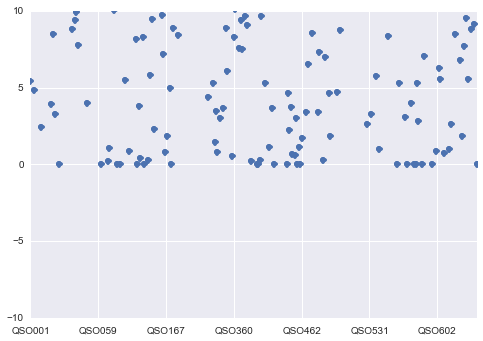

In [112]:
df = pd.read_csv('/home/lc585/Dropbox/IoA/nirspec/tables/masterlist_liam.csv', index_col=0) 

df = df[df.OIII_FLAG_2 > 0]
df = df[df.OIII_BAD_FIT_FLAG == 0]
df = df[df.FE_FLAG == 0]

print len(df[df.OIII_5007_EQW_3 < 1.0]) / len(df)

df.OIII_5007_EQW_3.plot(marker='o', linestyle='')
plt.ylim(-10, 10)